In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from copy import deepcopy as cdc

from datetime import datetime as dt
import re
def extract_timestamps(series:pd.Series) -> pd.Series:
    timestamp = series.str.extract('_(\d{4}-[\-\d_T]*)DLC', expand=False)
    return pd.to_datetime(timestamp, format="%Y-%m-%dT%H_%M_%S")
##need to have filename column as type str in order for datetime extraction to be used, won't run on Posix type

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import prey_capture_python as preycap
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h5_newmice="/Users/mollyshallow/Desktop/opto_metrics_result/20230530_newcohort_LD_test.h5"
h5_oldmice="/Users/mollyshallow/Desktop/opto_metrics_result/20230530_oldcohorts_LD_test.h5"

In [3]:
df_old=pd.read_hdf(h5_oldmice, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_old['folder_path'].astype('str')))
df_old['filename']=df_old['filename'].astype('str')
# type(df_all['filename'][0])
df_old=df_old[df_old['filename'].str.contains('0896|0897|0898|0893|0895')]
df_old['capduration']=df_old['captureT']-df_old['timetointercept']

df_new=pd.read_hdf(h5_newmice, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_new['folder_path'].astype('str')))
df_new['filename']=df_new['filename'].astype('str')
# type(df_all['filename'][0])
df_new=df_new[df_new['filename'].str.contains('1337|1429|1430')]
df_new['capduration']=df_new['captureT']-df_new['timetointercept']

df_all=pd.concat([df_old, df_new], ignore_index=True)

nandf=cdc(df_all)
nans=np.where(nandf['captureT']>=120)
nanvals=nandf['captureT'].iloc[nans[0]]
nandf=nandf.replace({'captureT':nanvals.values}, np.nan)

nan_attacks=np.where(nandf['timetointercept']>=120)
nan_attackvals=nandf['timetointercept'].iloc[nan_attacks[0]]
nandf=nandf.replace({'timetointercept':nan_attackvals.values}, np.nan)

nan_approach=np.where(nandf['timetoapproach']>=120)
nan_approachvals=nandf['timetoapproach'].iloc[nan_approach[0]]
nandf=nandf.replace({'timetoapproach':nan_approachvals.values}, np.nan)

nandf['capduration']=nandf['captureT']-nandf['timetointercept']

test_nandf=cdc(nandf)
test_nandf= test_nandf.drop(test_nandf[test_nandf.trials_to_drop == 'both'].index)

In [4]:
test_nandf=cdc(nandf)
test_nandf= test_nandf.drop(test_nandf[test_nandf.trials_to_drop == 'both'].index)

In [5]:
from datetime import datetime as dt
import re
def extract_timestamps(series:pd.Series) -> pd.Series:
    timestamp = series.str.extract('_(\d{4}-[\-\d_T]*)DLC', expand=False)
    return pd.to_datetime(timestamp, format="%Y-%m-%dT%H_%M_%S")

In [6]:
test=extract_timestamps(test_nandf["filename"])

test=test.to_list()
test_nandf['timestamps']=test

In [7]:
start_cohort1_l = dt.strptime('2022-02-10', "%Y-%m-%d")
end_cohort1_l = dt.strptime('2022-02-15', "%Y-%m-%d")

start_cohort1_d = dt.strptime('2022-02-16', "%Y-%m-%d")
end_cohort1_d = dt.strptime('2022-02-21', "%Y-%m-%d")

start_cohort2_l = dt.strptime('2022-07-11', "%Y-%m-%d")
end_cohort2_l = dt.strptime('2022-07-14', "%Y-%m-%d")

start_cohort2_d = dt.strptime('2022-07-15', "%Y-%m-%d")
end_cohort2_d = dt.strptime('2022-07-22', "%Y-%m-%d")


start_cohort3_l = dt.strptime('2022-12-07', "%Y-%m-%d")
end_cohort3_l = dt.strptime('2022-12-13', "%Y-%m-%d")

start_cohort3_d = dt.strptime('2023-01-05', "%Y-%m-%d")
end_cohort3_d = dt.strptime('2023-01-11', "%Y-%m-%d")

indices=np.asarray(test_nandf.index)

for i in indices:
    if start_cohort1_l<=test_nandf['timestamps'][i]<=end_cohort1_l:
        if test_nandf['condition'][i]!=[5,6]:
            test_nandf.at[i, 'condition']='baseline_l'
  
    elif start_cohort1_d<=test_nandf['timestamps'][i]<=end_cohort1_d:
        if test_nandf['condition'][i]!=[5,6]:
            test_nandf.at[i, 'condition']='baseline_d'
        
    elif start_cohort2_l<=test_nandf['timestamps'][i]<=end_cohort2_l:
        if test_nandf['condition'][i]!=[5,6]:
            test_nandf.at[i, 'condition']='baseline_l'
        
    elif start_cohort2_d<=test_nandf['timestamps'][i]<=end_cohort2_d:
        if test_nandf['condition'][i]!=[5,6]:
            test_nandf.at[i, 'condition']='baseline_d'
        
    elif start_cohort3_l<=test_nandf['timestamps'][i]<=end_cohort3_l:
        if test_nandf['condition'][i]!=[7,8]:
            test_nandf.at[i, 'condition']='baseline_l'
        
    elif start_cohort3_d<=test_nandf['timestamps'][i]<=end_cohort3_d:
        if test_nandf['condition'][i]!=[7,8]:
            test_nandf.at[i, 'condition']='baseline_d'

In [8]:
indices=np.asarray(test_nandf.index)
for i in indices:
    if test_nandf['condition'][i]=='9':
        test_nandf.at[i, 'condition']='2'

In [9]:
hue_order=[1,0]
palette=['#2976bb','#929591']

In [10]:
conds_keep=test_nandf[test_nandf['condition'].str.contains('1|2', na=False)]
conds_keep

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps
132,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-01-12_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.3915335337713834, 4.112710047534249, 4.4735...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.070,1082.0,...,0.116505,1.425,1.000000,0.500000,5.715,1143.0,12.67000,2.355,NaN,2022-02-15 10:01:12
133,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-21-03_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.116034346853949, 1.7375403061752268, 1.5469...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.425,1299.0,...,0.135166,1.150,1.000000,0.333333,2.450,490.0,9.13875,3.975,NaN,2022-02-15 10:21:03
134,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-23-08_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.46552343160596676, 0.6386597255830513, 0.81...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.990,1029.0,...,0.166412,5.025,0.500000,0.333333,16.445,3289.0,12.04850,5.545,NaN,2022-02-15 10:23:08
135,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-25-25_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.3773388261534625, 2.8636927702651525, 3.231...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.860,1170.0,...,0.163778,15.225,0.666667,0.250000,18.140,3628.0,12.87850,3.720,NaN,2022-02-15 10:25:25
136,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-27-44_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.7796982153955331, 0.8504793853925431, 1.046...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.940,1090.0,...,0.165798,0.075,0.428571,0.333333,0.755,151.0,13.93075,22.185,NaN,2022-02-15 10:27:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,...,0.141276,1.945,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only,2023-01-29 13:25:16
2436,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,...,0.197472,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only,2023-01-29 13:27:15
2437,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,...,0.040080,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only,2023-01-29 13:29:34
2438,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,...,0.163335,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only,2023-01-29 13:30:57


In [13]:
df0893=conds_keep[conds_keep['filename'].str.contains('0893')]
df0895=conds_keep[conds_keep['filename'].str.contains('0895')]
df0896=conds_keep[conds_keep['filename'].str.contains('0896')]
df0897=conds_keep[conds_keep['filename'].str.contains('0897')]
df0898=conds_keep[conds_keep['filename'].str.contains('0898')]
df1337=conds_keep[conds_keep['filename'].str.contains('1337')]
df1429=conds_keep[conds_keep['filename'].str.contains('1429')]
df1430=conds_keep[conds_keep['filename'].str.contains('1430')]

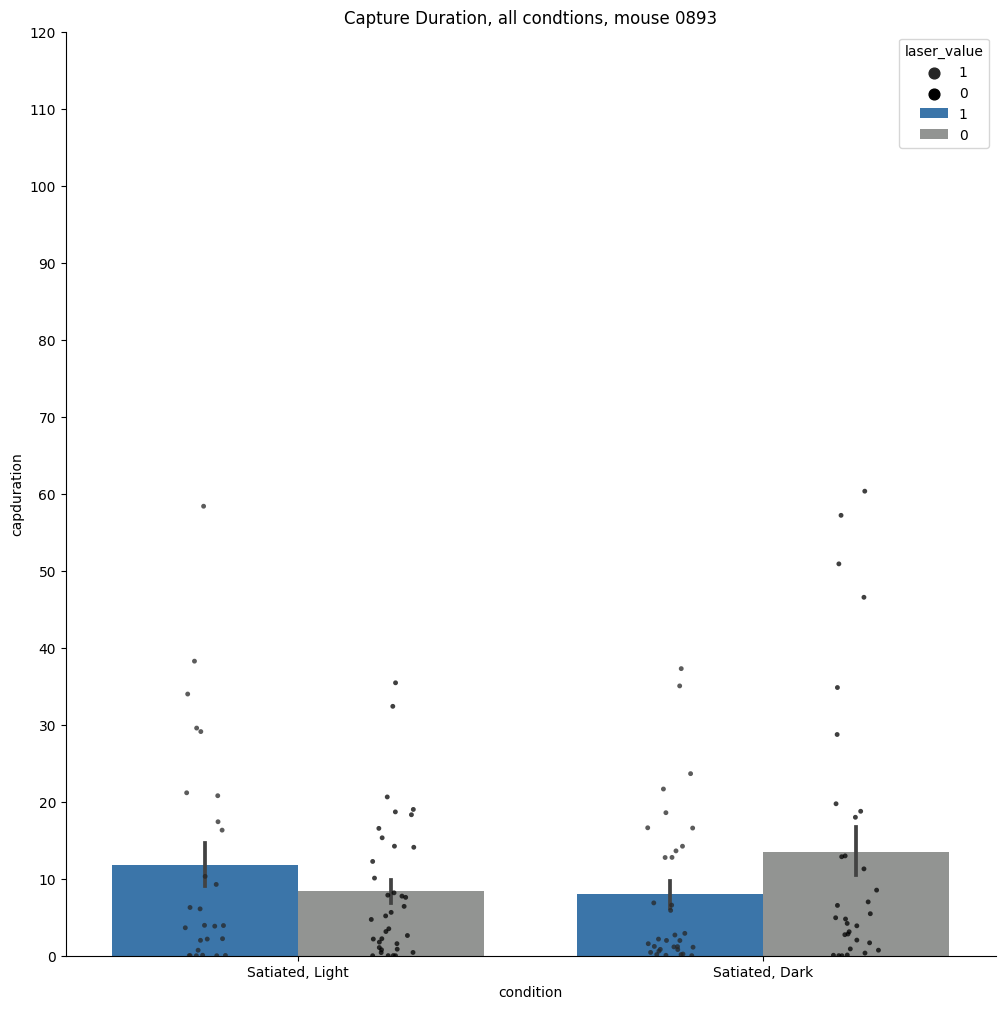

In [12]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0893, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0893, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 0893')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

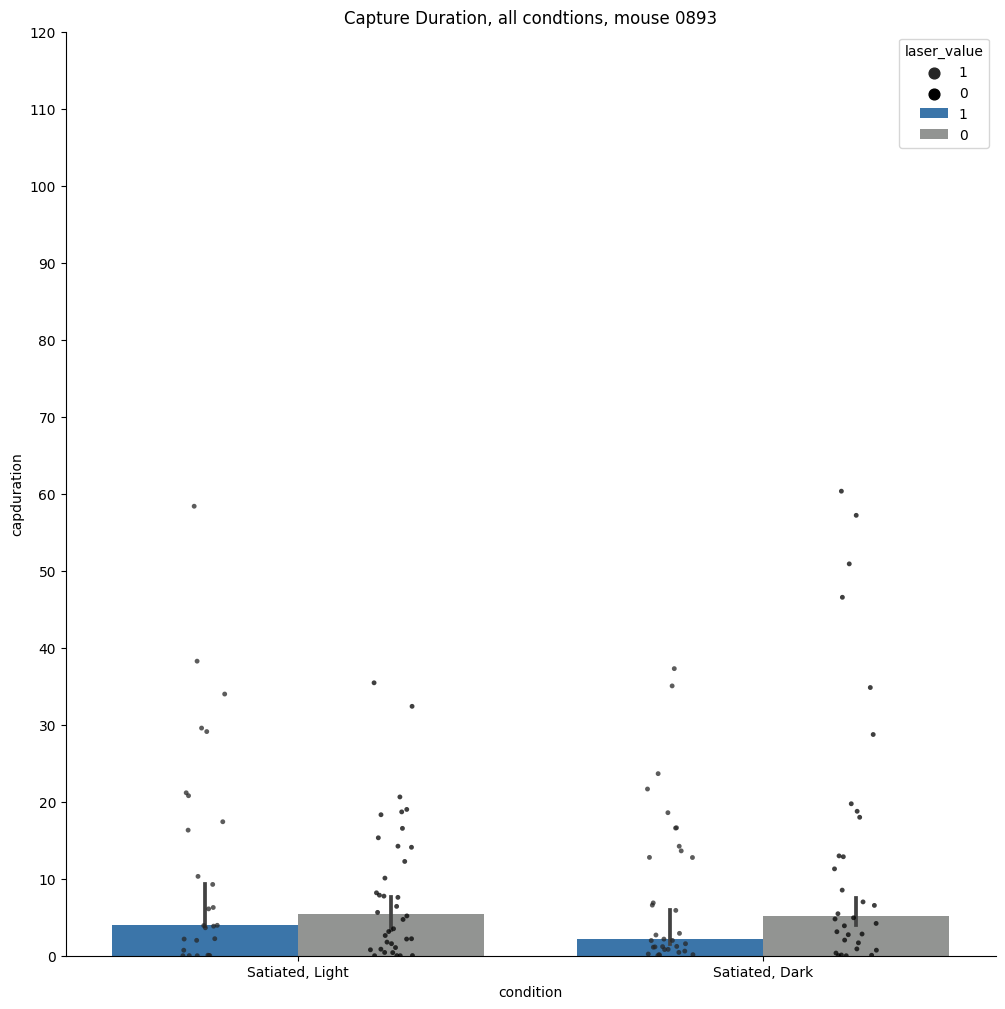

In [23]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0893, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order,estimator=np.median)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0893, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 0893')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

In [20]:
df0893.groupby(['condition', 'laser_value']).mean()

captureT  cricketdrop  captureframe  freqapproach  \
condition laser_value                                                       
1         0.0          18.856944  1777.692308   8102.948718      0.119570   
          1.0          20.786481  2214.379310   8310.413793      0.106139   
2         0.0          24.547187  1583.969697   7133.000000      0.117934   
          1.0          16.538939  2419.500000   6637.382353      0.096315   

                       timetoapproach  prob_inter  prob_capture  \
condition laser_value                                             
1         0.0                4.667308    0.514658      0.534900   
          1.0                4.939483    0.463565      0.495402   
2         0.0                3.551061    0.544591      0.509596   
          1.0                3.681029    0.613343      0.653221   

                       timetointercept  interceptframe  c_length  capduration  
condition laser_value                                                          
1         0.0                10.289211     2694.256410  9.863154     8.353194  
          1.0                 9.736071     2791.344828  8.707716    11.830185  
2         0.0                13.133939     2626.787879  8.814955    13.495781  
          1.0                 9.976471     1995.294118  8.306713     7.976364

In [14]:
df0895.groupby(['condition', 'laser_value']).mean()

captureT  cricketdrop  captureframe  freqapproach  \
condition laser_value                                                       
1         0.0          25.386528  2126.000000   8487.578947      0.114517   
          1.0          26.805500  2062.900000   7424.000000      0.100573   
2         0.0          36.335645  1871.531250   9873.093750      0.138333   
          1.0          20.035278  2610.166667   6617.222222      0.106986   

                       timetoapproach  prob_inter  prob_capture  \
condition laser_value                                             
1         0.0                6.078158    0.544639      0.590843   
          1.0                6.697167    0.487950      0.651984   
2         0.0                3.233125    0.394235      0.581027   
          1.0                4.443611    0.507455      0.644213   

                       timetointercept  interceptframe   c_length  capduration  
condition laser_value                                                           
1         0.0                15.325526     3065.105263  23.423158    10.134722  
          1.0                15.527667     3105.533333  48.416533    11.277833  
2         0.0                15.435323     3945.125000   8.982570    20.900323  
          1.0                13.630972     2726.194444   8.831542     6.404306

In [ ]:
all_norm = pd.DataFrame()
ages=[11,12,14,16]
sweeps=np.arange(3,13)
df_all=wt_all_no0
condition='WT'
def ahp_normalize_intact(ages = ages, sweeps = sweeps, df_all = df_all, condition = condition, all_norm=all_norm): 
    for sweep in sweeps:
        df_values = pd.read_pickle('AHP_df_'+ condition + '_p' + str(ages[0]) + '.pkl')
        df_values['ahp']=df_values['ahp'].astype(float)
        df_values_no0 = df_values[df_values.index != 0]
        df_values_no0 = df_values_no0.groupby(['sweepn','celln']).mean()
        df_values_no0 = df_values_no0.loc[str(sweep)]
        meanfornorm = df_values_no0.mean()
        print(meanfornorm)
        for age in ages:
            data_age = df_all[(df_all.age =='P' + str(age)) & (df_all.sweepn ==sweep)].copy()
            # print(data_age)
            data_age['ahp']=data_age['ahp'].astype(float)
            data_age=data_age.groupby(['celln']).mean()
            data_age=data_age.reset_index()
            norm=data_age.loc[:,'ahp'].div(meanfornorm[0], axis=0)
            norm=np.asarray(norm)
            data_age['normal']=norm
            
            normalized_df=pd.DataFrame(columns=['celln', 'sweepn','ahp','normal','age'])
            normalized_df['celln'] = data_age['celln']
            normalized_df['sweepn'] = data_age['sweepn']
            normalized_df['ahp']=data_age['ahp']
            normalized_df['normal']=data_age['normal']
            normalized_df['age']=np.repeat('P'+str(age), data_age.shape[0])
            all_norm=all_norm.append(normalized_df)
    return all_norm

In [11]:
df_all=conds_keep

In [12]:
df_all

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps
132,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-01-12_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.3915335337713834, 4.112710047534249, 4.4735...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.070,1082.0,...,0.116505,1.425,1.000000,0.500000,5.715,1143.0,12.67000,2.355,NaN,2022-02-15 10:01:12
133,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-21-03_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.116034346853949, 1.7375403061752268, 1.5469...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.425,1299.0,...,0.135166,1.150,1.000000,0.333333,2.450,490.0,9.13875,3.975,NaN,2022-02-15 10:21:03
134,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-23-08_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.46552343160596676, 0.6386597255830513, 0.81...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.990,1029.0,...,0.166412,5.025,0.500000,0.333333,16.445,3289.0,12.04850,5.545,NaN,2022-02-15 10:23:08
135,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-25-25_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.3773388261534625, 2.8636927702651525, 3.231...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.860,1170.0,...,0.163778,15.225,0.666667,0.250000,18.140,3628.0,12.87850,3.720,NaN,2022-02-15 10:25:25
136,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-27-44_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.7796982153955331, 0.8504793853925431, 1.046...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.940,1090.0,...,0.165798,0.075,0.428571,0.333333,0.755,151.0,13.93075,22.185,NaN,2022-02-15 10:27:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,...,0.141276,1.945,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only,2023-01-29 13:25:16
2436,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,...,0.197472,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only,2023-01-29 13:27:15
2437,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,...,0.040080,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only,2023-01-29 13:29:34
2438,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,...,0.163335,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only,2023-01-29 13:30:57


In [43]:
df0893=df_all[df_all['filename'].str.contains('0893')]
df0893.groupby(['condition', 'laser_value']).mean()

captureT  cricketdrop  captureframe  freqapproach  \
condition laser_value                                                       
1         0.0          18.856944  1777.692308   8102.948718      0.119570   
          1.0          20.786481  2214.379310   8310.413793      0.106139   
2         0.0          24.547187  1583.969697   7133.000000      0.117934   
          1.0          16.538939  2419.500000   6637.382353      0.096315   

                       timetoapproach  prob_inter  prob_capture  \
condition laser_value                                             
1         0.0                4.667308    0.514658      0.534900   
          1.0                4.939483    0.463565      0.495402   
2         0.0                3.551061    0.544591      0.509596   
          1.0                3.681029    0.613343      0.653221   

                       timetointercept  interceptframe  c_length  capduration  
condition laser_value                                                          
1         0.0                10.289211     2694.256410  9.863154     8.353194  
          1.0                 9.736071     2791.344828  8.707716    11.830185  
2         0.0                13.133939     2626.787879  8.814955    13.495781  
          1.0                 9.976471     1995.294118  8.306713     7.976364

In [80]:
mouse=['0893']

df_values = df_all[df_all['filename'].str.contains('{}'.format(mouse))]

df_values

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps
132,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-01-12_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.3915335337713834, 4.112710047534249, 4.4735...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.070,1082.0,...,0.116505,1.425,1.000000,0.500000,5.715,1143.0,12.67000,2.355,NaN,2022-02-15 10:01:12
133,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-21-03_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.116034346853949, 1.7375403061752268, 1.5469...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.425,1299.0,...,0.135166,1.150,1.000000,0.333333,2.450,490.0,9.13875,3.975,NaN,2022-02-15 10:21:03
134,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-23-08_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.46552343160596676, 0.6386597255830513, 0.81...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.990,1029.0,...,0.166412,5.025,0.500000,0.333333,16.445,3289.0,12.04850,5.545,NaN,2022-02-15 10:23:08
135,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-25-25_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.3773388261534625, 2.8636927702651525, 3.231...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.860,1170.0,...,0.163778,15.225,0.666667,0.250000,18.140,3628.0,12.87850,3.720,NaN,2022-02-15 10:25:25
136,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-15_10-27-44_mouse-0898,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.7796982153955331, 0.8504793853925431, 1.046...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.940,1090.0,...,0.165798,0.075,0.428571,0.333333,0.755,151.0,13.93075,22.185,NaN,2022-02-15 10:27:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-23_9-49-52_mouse-1429,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.600508332713547, 8.890209138322872, 10.0064...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",18.940,1700.0,...,0.070028,2.545,0.500000,1.000000,6.265,1253.0,10.02800,12.675,left_only,2023-01-23 09:49:52
2246,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-23_9-51-53_mouse-1429,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.262638297000267, 10.947495531210933, 15.430...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.010,1654.0,...,0.105300,1.285,1.000000,0.500000,4.100,820.0,9.88500,5.910,left_only,2023-01-23 09:51:53
2247,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-23_9-54-36_mouse-1429,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.796403543872983, 7.040993949890903, 8.11303...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9.280,1567.0,...,0.075146,2.955,0.500000,1.000000,9.225,1845.0,8.16150,0.055,left_only,2023-01-23 09:54:36
2248,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-23_9-56-19_mouse-1429,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.9259874662055101, 1.0726267521482857, 1.668...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.110,1398.0,...,0.086561,0.110,0.500000,1.000000,2.075,415.0,10.02475,6.035,left_only,2023-01-23 09:56:19


In [ ]:
df0893=conds_keep[conds_keep['filename'].str.contains('0893')]

In [154]:
df_all.keys()

Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')

In [140]:
normalized_capT = pd.DataFrame()
mice=['0893', '0895', '0896', '0897', '0898', '1337','1429', '1430']

df_all=conds_keep
conditions=[1,2]
metric=['captureT']
# cond_index=0
def ind_mouse_deltacapT(mice = mice,  df_all = df_all, conditions = conditions, metric=metric, normalized_capT=normalized_capT): 
    # df=pd.DataFrame()
    for mouse in mice:
        print('working on mouse #{}'.format(mouse))
        df_values = (df_all[df_all['filename'].str.contains('{}'.format(mouse))]) ## subset df to just be for one mouse
        
        df_values_formean=df_values.copy()
        df_values_formean = df_values_formean.groupby(['condition','laser_value']).mean()
        df_values_formean.reset_index(level=[0,1], inplace=True)

        # print(df_values.keys())
        
        meanfornorm = df_values_formean[df_values_formean.laser_value==0.0]
        # print(meanfornorm[metric].loc[0])

        for cond in conditions:
            print('the condition is {}'.format(cond))
            if cond==1:
                cond_index=0
            else:
                cond_index=2
            print('the condition index is {}'.format(cond_index))
            data_cond = (df_values[df_values['condition'].str.contains('{}'.format(cond))].copy())
            # print(data_cond.keys())
            data_cond[metric]=data_cond[metric].astype(float)

            norm=data_cond.loc[:,metric].div(meanfornorm[metric].loc[cond_index], axis=1)
            print('the value for normalization is {}'.format(meanfornorm[metric].loc[cond_index]))
            norm=np.asarray(norm)
            
            # print(norm)

            # print(data_cond['normal_{}'.format(metric)])
      
            normalized_df=pd.DataFrame(columns=['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'])
        
        
            normalized_df['filename'] = data_cond['filename']
            normalized_df['folder_path'] = data_cond['folder_path']
            normalized_df['condition']=data_cond['condition']
            normalized_df['laser_value']=data_cond['laser_value']
            normalized_df['dist'] = data_cond['dist']
            normalized_df['cricket_spd'] = data_cond['cricket_spd']
            normalized_df['mouse_spd']=data_cond['mouse_spd']
            normalized_df['az']=data_cond['az']
            normalized_df['captureT'] = data_cond['captureT']
            normalized_df['cricketdrop'] = data_cond['cricketdrop']
            normalized_df['captureframe']=data_cond['captureframe']
            normalized_df['freqapproach']=data_cond['freqapproach']
            normalized_df['timetoapproach'] = data_cond['timetoapproach']
            normalized_df['prob_inter'] = data_cond['prob_inter']
            normalized_df['prob_capture']=data_cond['prob_capture']
            normalized_df['timetointercept']=data_cond['timetointercept']
            normalized_df['interceptframe'] = data_cond['interceptframe']
            normalized_df['c_length'] = data_cond['c_length']
            normalized_df['capduration']=data_cond['capduration']
            normalized_df['trials_to_drop']=data_cond['trials_to_drop']
            normalized_df['timestamps']=data_cond['timestamps']
            normalized_df['normal_capT']=norm
            
            
            normalized_capT=normalized_capT.append(normalized_df)
    return normalized_capT

In [141]:
normalized_capT = ind_mouse_deltacapT(mice = mice,  df_all = df_all, conditions = conditions, metric=['captureT'])

working on mouse #0893
the condition is 1
the condition index is 0
the value for normalization is captureT    18.856944
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    24.547187
Name: 2, dtype: float64
working on mouse #0895
the condition is 1
the condition index is 0
the value for normalization is captureT    25.386528
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    36.335645
Name: 2, dtype: float64
working on mouse #0896
the condition is 1
the condition index is 0
the value for normalization is captureT    25.101528
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    14.387564
Name: 2, dtype: float64
working on mouse #0897
the condition is 1
the condition index is 0
the value for normalization is captureT    10.414512
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for nor

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

working on mouse #1337
the condition is 1
the condition index is 0
the value for normalization is captureT    70.446538
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    47.835357
Name: 2, dtype: float64
working on mouse #1429
the condition is 1
the condition index is 0
the value for normalization is captureT    20.876618
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    29.573704
Name: 2, dtype: float64
working on mouse #1430
the condition is 1
the condition index is 0
the value for normalization is captureT    16.356731
Name: 0, dtype: float64
the condition is 2
the condition index is 2
the value for normalization is captureT    38.456667
Name: 2, dtype: float64


/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capT=normalized_capT.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/1701738539.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [73]:
normalized_capT

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps,normal_capT
1338,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-17-22_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10.42059731960664, 11.491143127838354, 15.365...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000,0.0,...,0.000,0.000000,0.000000,0.000,0.0,7.25400,0.000,NaN,2022-07-14 10:17:22,0.000000
1339,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-19-08_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.862810092503858, 14.595337847995504, 15.45...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",17.590,3759.0,...,4.170,0.666667,0.250000,7.510,1502.0,8.62850,10.080,NaN,2022-07-14 10:19:08,0.932813
1340,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-20-44_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.940976415257134, 4.137096812011739, 6.86092...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.275,740.0,...,0.155,1.000000,0.500000,1.135,227.0,9.03900,3.140,NaN,2022-07-14 10:20:44,0.226707
1341,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-22-30_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.5345637027225354, 1.960342005662819, 2.1666...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.640,751.0,...,0.240,1.000000,1.000000,0.630,126.0,10.78875,0.010,NaN,2022-07-14 10:22:30,0.033940
1342,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-23-49_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.6336679442128126, 1.2211572961671076, 1.139...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.390,990.0,...,1.600,0.818182,0.111111,11.710,2342.0,10.44950,18.680,NaN,2022-07-14 10:23:49,1.611608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,...,1.945,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only,2023-01-29 13:25:16,0.585724
2436,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,...,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only,2023-01-29 13:27:15,0.315290
2437,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,...,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only,2023-01-29 13:29:34,0.175262
2438,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,...,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only,2023-01-29 13:30:57,NaN


In [75]:
normalized_capD = pd.DataFrame()
mice=['0893', '0895', '0896', '0897', '0898', '1337','1429', '1430']

df_all=conds_keep
conditions=[1,2]
metric=['capduration']
# cond_index=0
def ind_mouse_deltacapD(mice = mice,  df_all = df_all, conditions = conditions, metric=metric, normalized_capD=normalized_capD): 
    # df=pd.DataFrame()
    for mouse in mice:
        df_values = (df_all[df_all['filename'].str.contains('{}'.format(mouse))]) ## subset df to just be for one mouse
        
        df_values_formean=df_values.copy()
        df_values_formean = df_values_formean.groupby(['condition','laser_value']).mean()
        df_values_formean.reset_index(level=[0,1], inplace=True)

        print(df_values.keys())
        
        meanfornorm = df_values_formean[df_values_formean.laser_value==0.0]
        print(meanfornorm[metric].loc[0])

        for cond in conditions:
            if cond==1:
                cond_index=0
            else:
                cond_index=2
            print(cond_index)
            data_cond = (df_values[df_values['condition'].str.contains('{}'.format(cond))].copy())
            print(data_cond.keys())
            data_cond[metric]=data_cond[metric].astype(float)

            norm=data_cond.loc[:,metric].div(meanfornorm[metric].loc[cond_index], axis=1)
            norm=np.asarray(norm)
            
            # print(norm)

            # print(data_cond['normal_{}'.format(metric)])
      
            normalized_df=pd.DataFrame(columns=['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'])
        
        
            normalized_df['filename'] = data_cond['filename']
            normalized_df['folder_path'] = data_cond['folder_path']
            normalized_df['condition']=data_cond['condition']
            normalized_df['laser_value']=data_cond['laser_value']
            normalized_df['dist'] = data_cond['dist']
            normalized_df['cricket_spd'] = data_cond['cricket_spd']
            normalized_df['mouse_spd']=data_cond['mouse_spd']
            normalized_df['az']=data_cond['az']
            normalized_df['captureT'] = data_cond['captureT']
            normalized_df['cricketdrop'] = data_cond['cricketdrop']
            normalized_df['captureframe']=data_cond['captureframe']
            normalized_df['freqapproach']=data_cond['freqapproach']
            normalized_df['timetoapproach'] = data_cond['timetoapproach']
            normalized_df['prob_inter'] = data_cond['prob_inter']
            normalized_df['prob_capture']=data_cond['prob_capture']
            normalized_df['timetointercept']=data_cond['timetointercept']
            normalized_df['interceptframe'] = data_cond['interceptframe']
            normalized_df['c_length'] = data_cond['c_length']
            normalized_df['capduration']=data_cond['capduration']
            normalized_df['trials_to_drop']=data_cond['trials_to_drop']
            normalized_df['timestamps']=data_cond['timestamps']
            normalized_df['normal_capduration']=norm
            
            
            normalized_capD=normalized_capD.append(normalized_df)
    return normalized_capD

In [76]:
normalized_capD = ind_mouse_deltacapD(mice = mice,  df_all = df_all, conditions = conditions, metric=['capduration'])


Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
capduration    8.353194
Name: 0, dtype: float64
0
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
2
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)


Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
capduration    10.134722
Name: 0, dtype: float64
0
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
2
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture',

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
capduration    6.887317
Name: 0, dtype: float64
0
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
2
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
capduration    36.785
Name: 0, dtype: float64
0
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
2
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 't

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)


2
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps'],
      dtype='object')
capduration    7.219423
Name: 0, dtype: float64
0
Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 

/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)
/var/folders/l5/1kgct62n6sj5__7b7_13bmkm0000gn/T/ipykernel_62501/3075721941.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_capD=normalized_capD.append(normalized_df)


In [77]:
normalized_capD

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps,normal_capduration
1338,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-17-22_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10.42059731960664, 11.491143127838354, 15.365...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000,0.0,...,0.000,0.000000,0.000000,0.000,0.0,7.25400,0.000,NaN,2022-07-14 10:17:22,0.000000
1339,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-19-08_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.862810092503858, 14.595337847995504, 15.45...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",17.590,3759.0,...,4.170,0.666667,0.250000,7.510,1502.0,8.62850,10.080,NaN,2022-07-14 10:19:08,1.206724
1340,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-20-44_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.940976415257134, 4.137096812011739, 6.86092...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.275,740.0,...,0.155,1.000000,0.500000,1.135,227.0,9.03900,3.140,NaN,2022-07-14 10:20:44,0.375904
1341,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-22-30_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.5345637027225354, 1.960342005662819, 2.1666...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.640,751.0,...,0.240,1.000000,1.000000,0.630,126.0,10.78875,0.010,NaN,2022-07-14 10:22:30,0.001197
1342,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-23-49_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.6336679442128126, 1.2211572961671076, 1.139...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.390,990.0,...,1.600,0.818182,0.111111,11.710,2342.0,10.44950,18.680,NaN,2022-07-14 10:23:49,2.236270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,...,1.945,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only,2023-01-29 13:25:16,0.848544
2436,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,...,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only,2023-01-29 13:27:15,0.027162
2437,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,...,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only,2023-01-29 13:29:34,0.001086
2438,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,...,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only,2023-01-29 13:30:57,NaN


In [70]:
normalized_capD.keys()

Index(['filename', 'folder_path', 'condition', 'laser_value', 'dist',
       'cricket_spd', 'mouse_spd', 'az', 'captureT', 'cricketdrop',
       'captureframe', 'freqapproach', 'timetoapproach', 'prob_inter',
       'prob_capture', 'timetointercept', 'interceptframe', 'c_length',
       'capduration', 'trials_to_drop', 'timestamps',
       'normal_['capduration']'],
      dtype='object')

In [78]:
norm_conds_keep=normalized_capT
norm_conds_keep['normal_capduration']=normalized_capD['normal_capduration']

In [79]:
norm_conds_keep

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,...,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop,timestamps,normal_capT,normal_capduration
1338,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-17-22_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10.42059731960664, 11.491143127838354, 15.365...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000,0.0,...,0.000000,0.000000,0.000,0.0,7.25400,0.000,NaN,2022-07-14 10:17:22,0.000000,0.000000
1339,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-19-08_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.862810092503858, 14.595337847995504, 15.45...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",17.590,3759.0,...,0.666667,0.250000,7.510,1502.0,8.62850,10.080,NaN,2022-07-14 10:19:08,0.932813,1.206724
1340,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-20-44_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.940976415257134, 4.137096812011739, 6.86092...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.275,740.0,...,1.000000,0.500000,1.135,227.0,9.03900,3.140,NaN,2022-07-14 10:20:44,0.226707,0.375904
1341,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-22-30_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.5345637027225354, 1.960342005662819, 2.1666...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.640,751.0,...,1.000000,1.000000,0.630,126.0,10.78875,0.010,NaN,2022-07-14 10:22:30,0.033940,0.001197
1342,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-14_10-23-49_mouse-0893,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.6336679442128126, 1.2211572961671076, 1.139...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.390,990.0,...,0.818182,0.111111,11.710,2342.0,10.44950,18.680,NaN,2022-07-14 10:23:49,1.611608,2.236270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,...,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only,2023-01-29 13:25:16,0.585724,0.848544
2436,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,...,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only,2023-01-29 13:27:15,0.315290,0.027162
2437,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,...,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only,2023-01-29 13:29:34,0.175262,0.001086
2438,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,...,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only,2023-01-29 13:30:57,NaN,NaN


In [ ]:
### calculate modulation index/ individual mouse delta for key values, need to normalize to laser_value=0


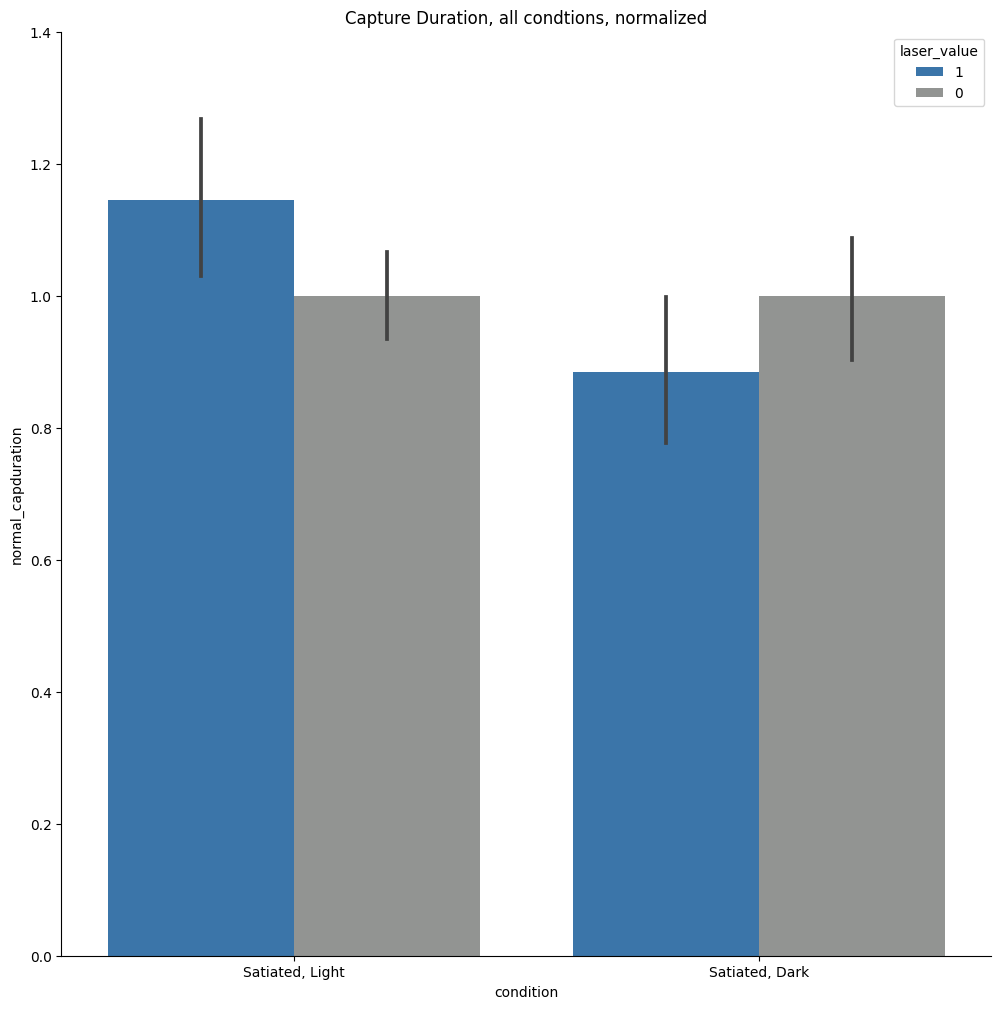

In [129]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=norm_conds_keep, x='condition', y='normal_capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='normal_capduration', hue='laser_value',dodge=True, data=norm_conds_keep, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, normalized')
plt.ylim(0.0,1.4)
# plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/groupdata/normalizedcapduration_allmice_noswarm.pdf')

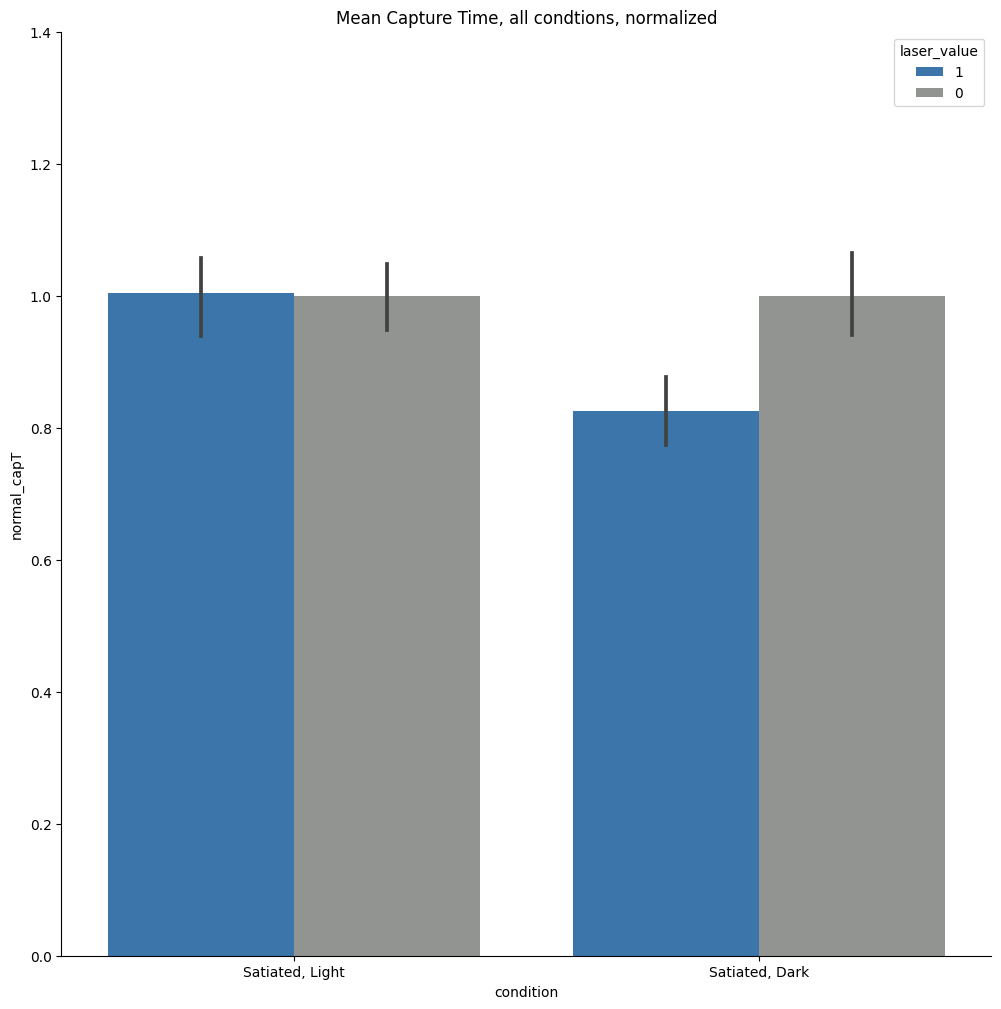

In [131]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=norm_conds_keep, x='condition', y='normal_capT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='normal_capT', hue='laser_value',dodge=True, data=norm_conds_keep, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Mean Capture Time, all condtions, normalized')
plt.ylim(0.0, 1.4)
# plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/groupdata/normalizedcapT_allmice_noswarm.pdf')

In [92]:
df0893=norm_conds_keep[norm_conds_keep['filename'].str.contains('0893')]
df0895=norm_conds_keep[norm_conds_keep['filename'].str.contains('0895')]
df0896=norm_conds_keep[norm_conds_keep['filename'].str.contains('0896')]
df0897=norm_conds_keep[norm_conds_keep['filename'].str.contains('0897')]
df0898=norm_conds_keep[norm_conds_keep['filename'].str.contains('0898')]
df1337=norm_conds_keep[norm_conds_keep['filename'].str.contains('1337')]
df1429=norm_conds_keep[norm_conds_keep['filename'].str.contains('1429')]
df1430=norm_conds_keep[norm_conds_keep['filename'].str.contains('1430')]

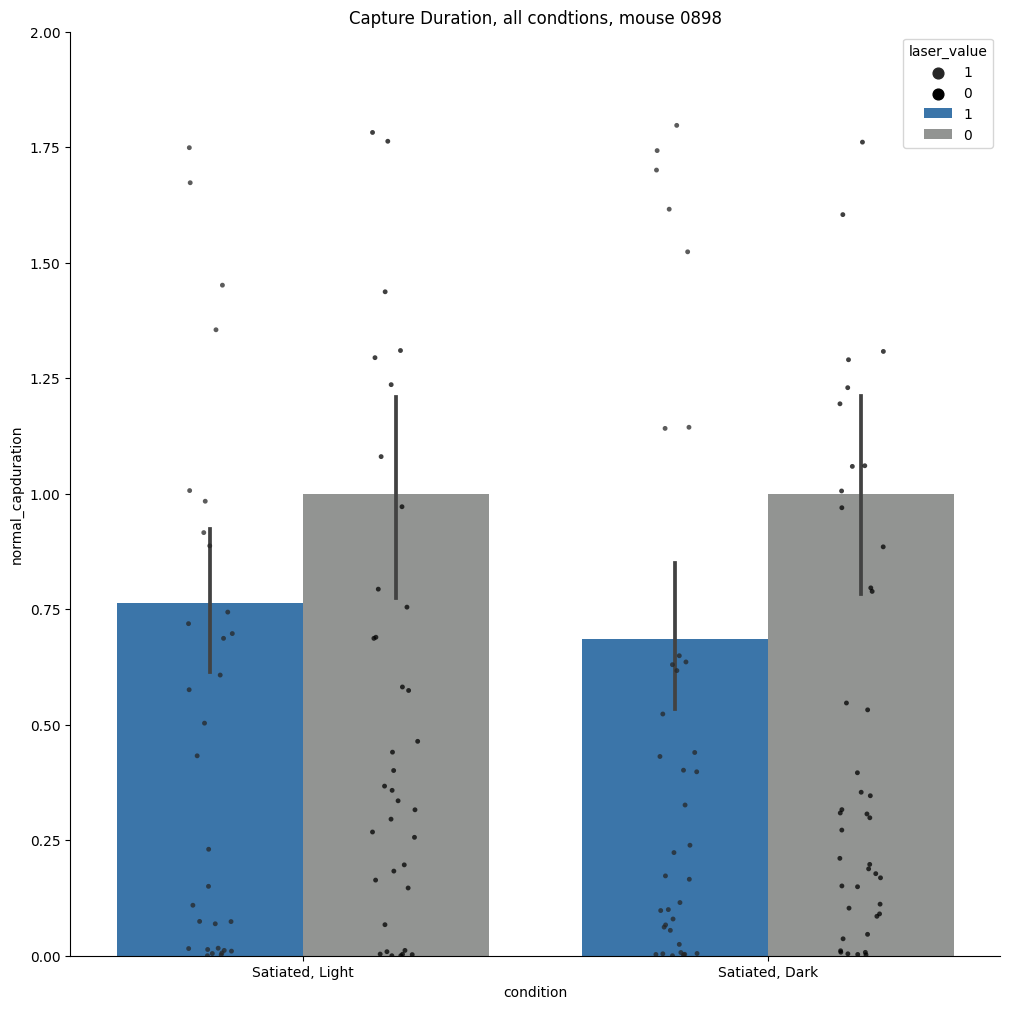

In [121]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0898, x='condition', y='normal_capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='normal_capduration', hue='laser_value',dodge=True, data=df0898, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 0898')
plt.ylim(0.0,2.0)
# plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/groupdata/normalizedcapduration_mouse0898_clipped.pdf')

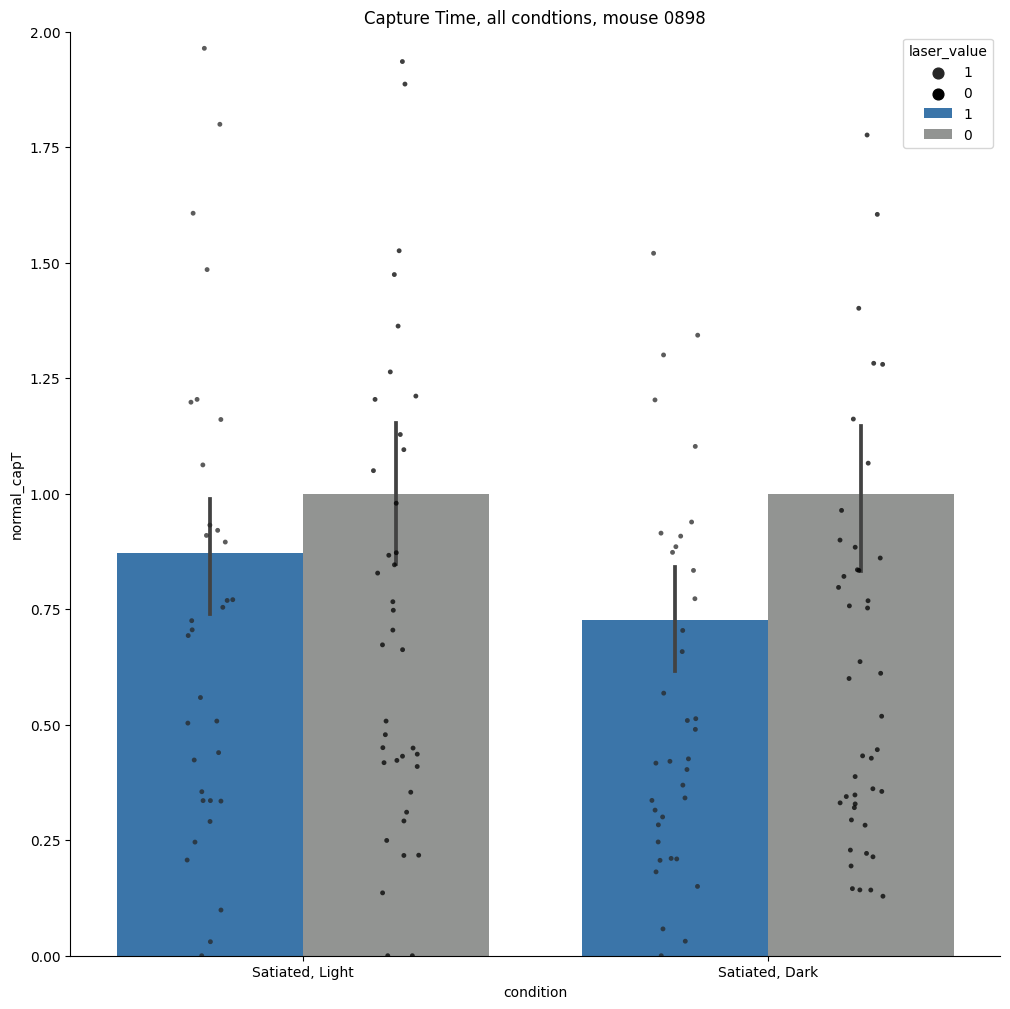

In [127]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0898, x='condition', y='normal_capT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='normal_capT', hue='laser_value',dodge=True, data=df0898, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0898')
plt.ylim(0.0,2.0)
# plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/groupdata/normalizedcapdT_mouse0889_clipped.pdf')

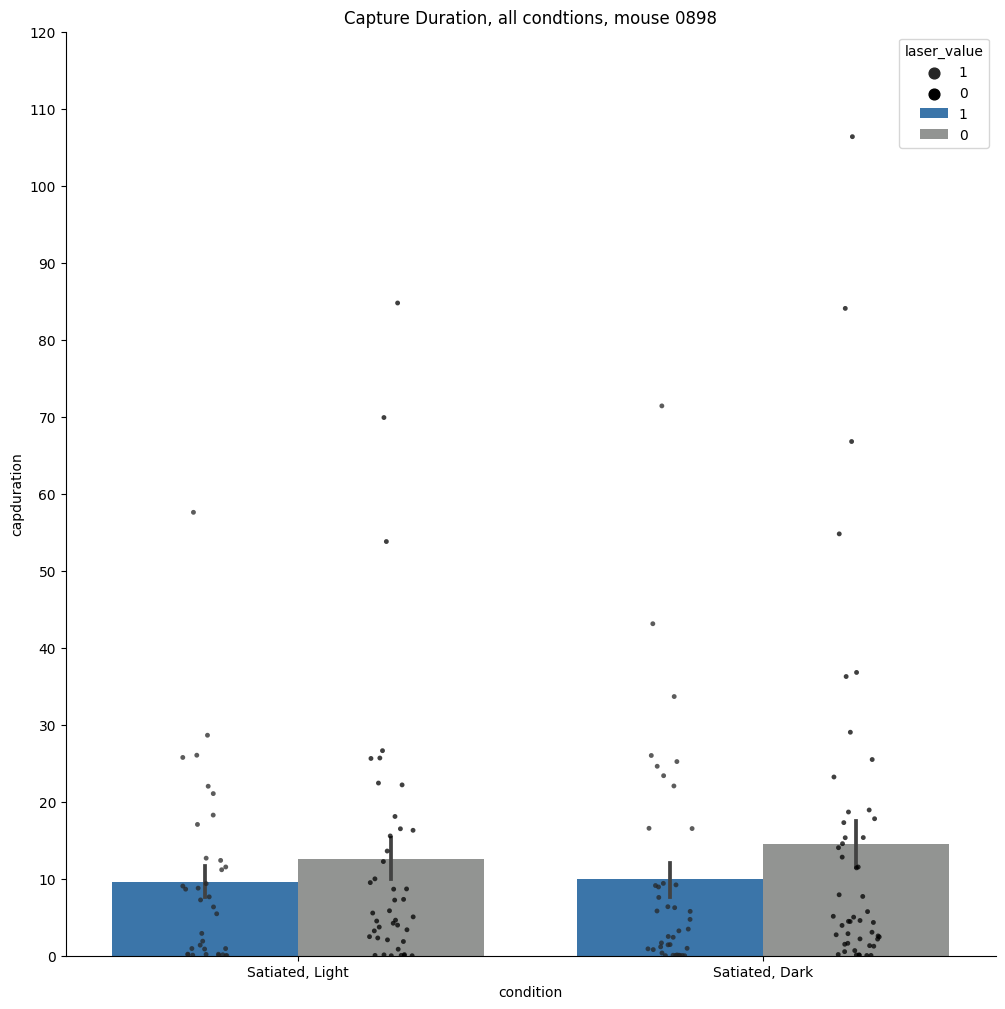

In [15]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0898, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0898, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 0898')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

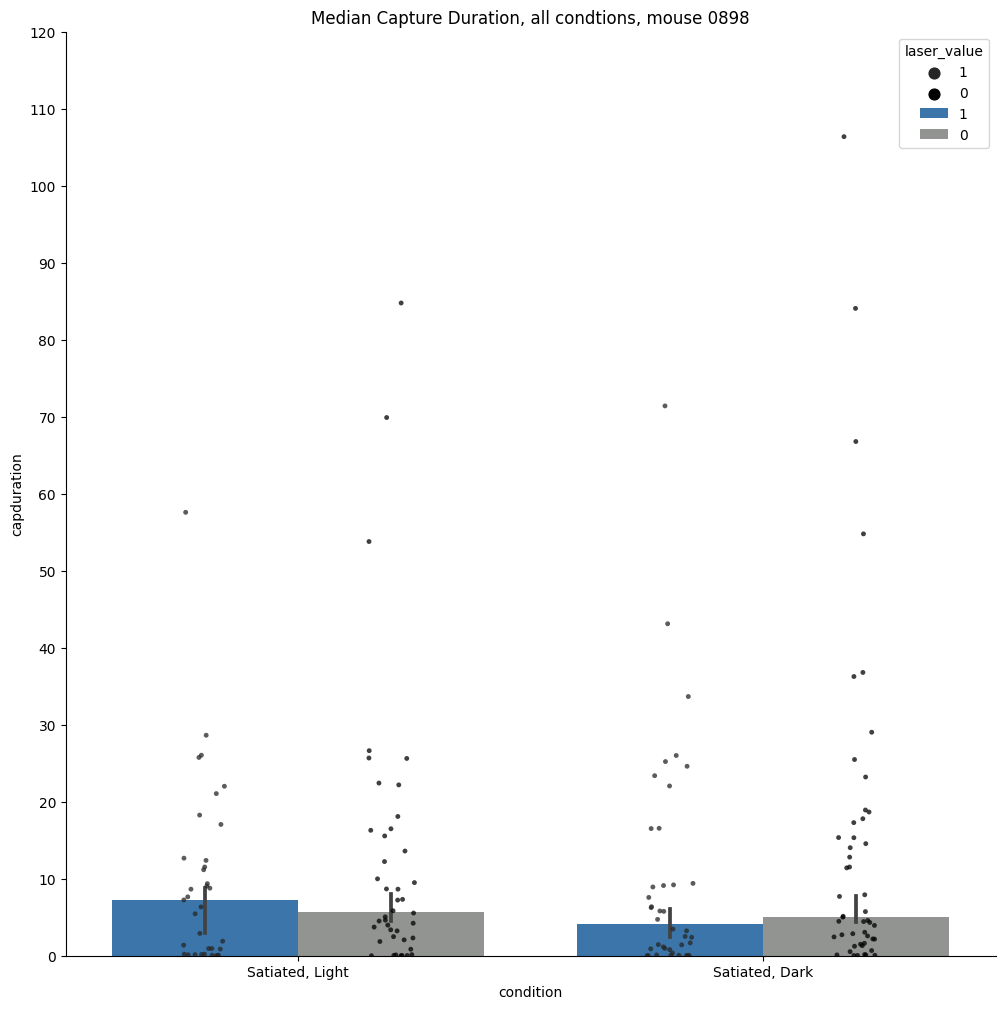

In [26]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df0898, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order,estimator=np.median)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0898, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Median Capture Duration, all condtions, mouse 0898')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

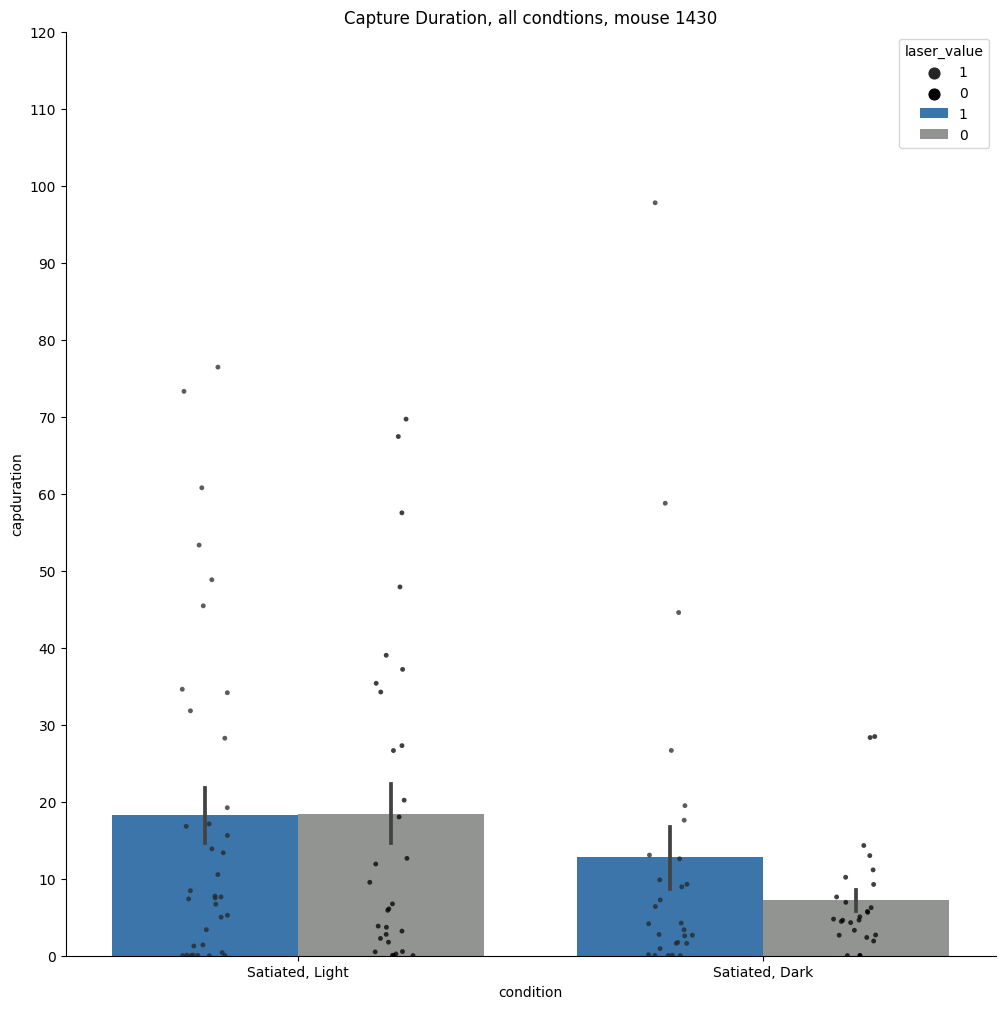

In [16]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1430, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1430, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 1430')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

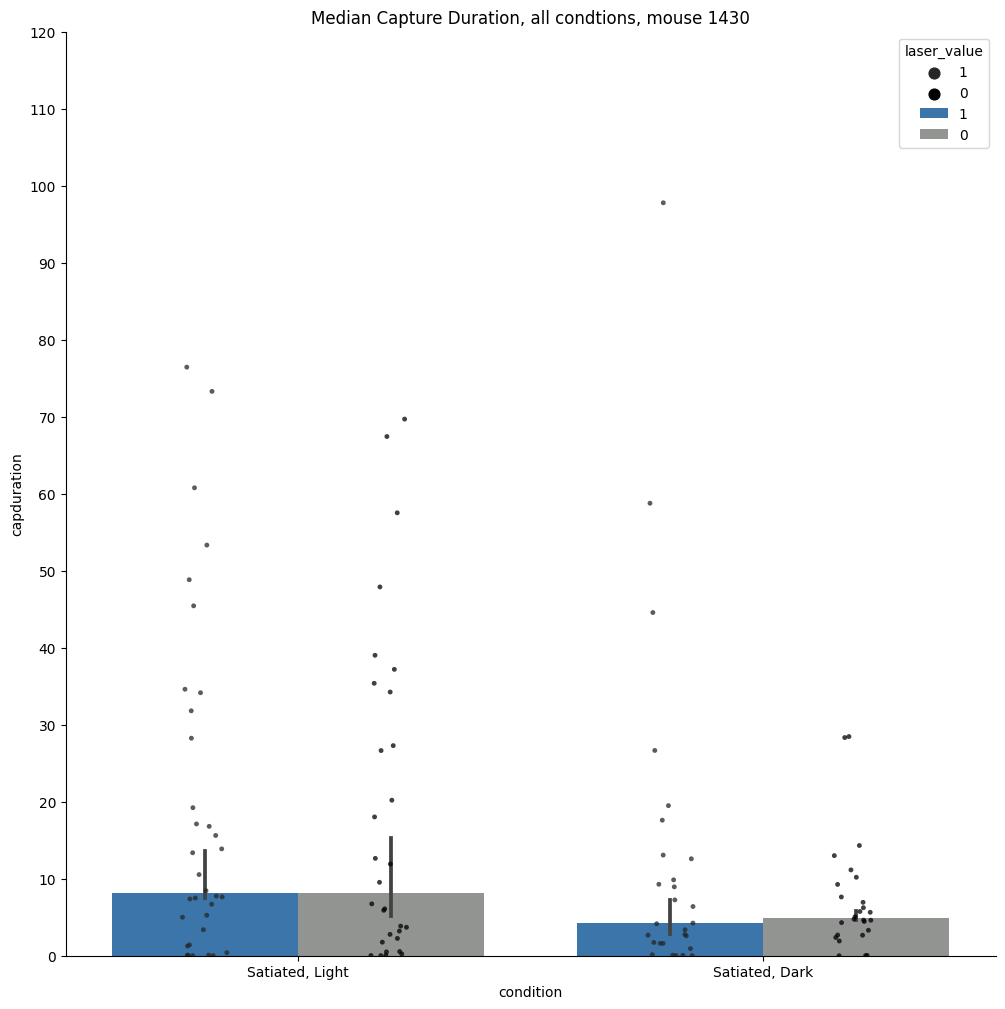

In [27]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1430, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order,estimator=np.median)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1430, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Median Capture Duration, all condtions, mouse 1430')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

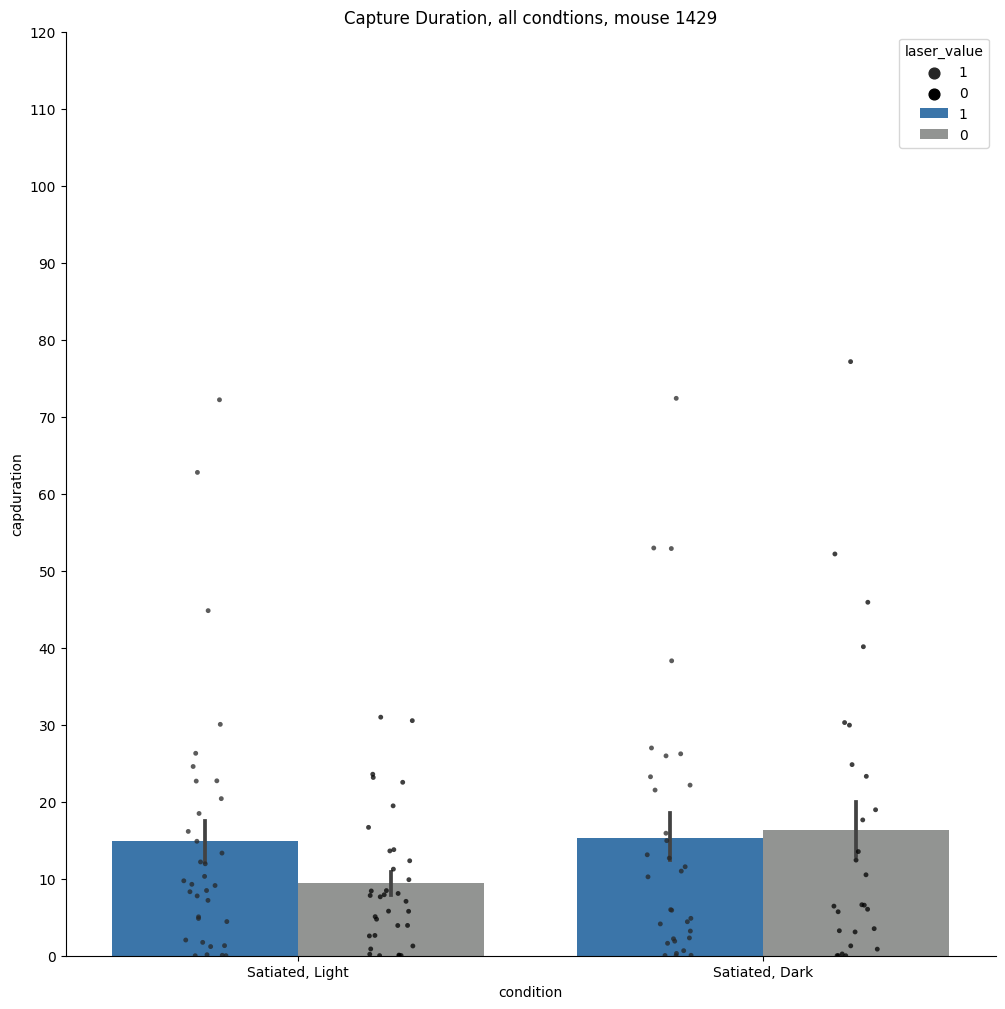

In [17]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1429, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1429, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 1429')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

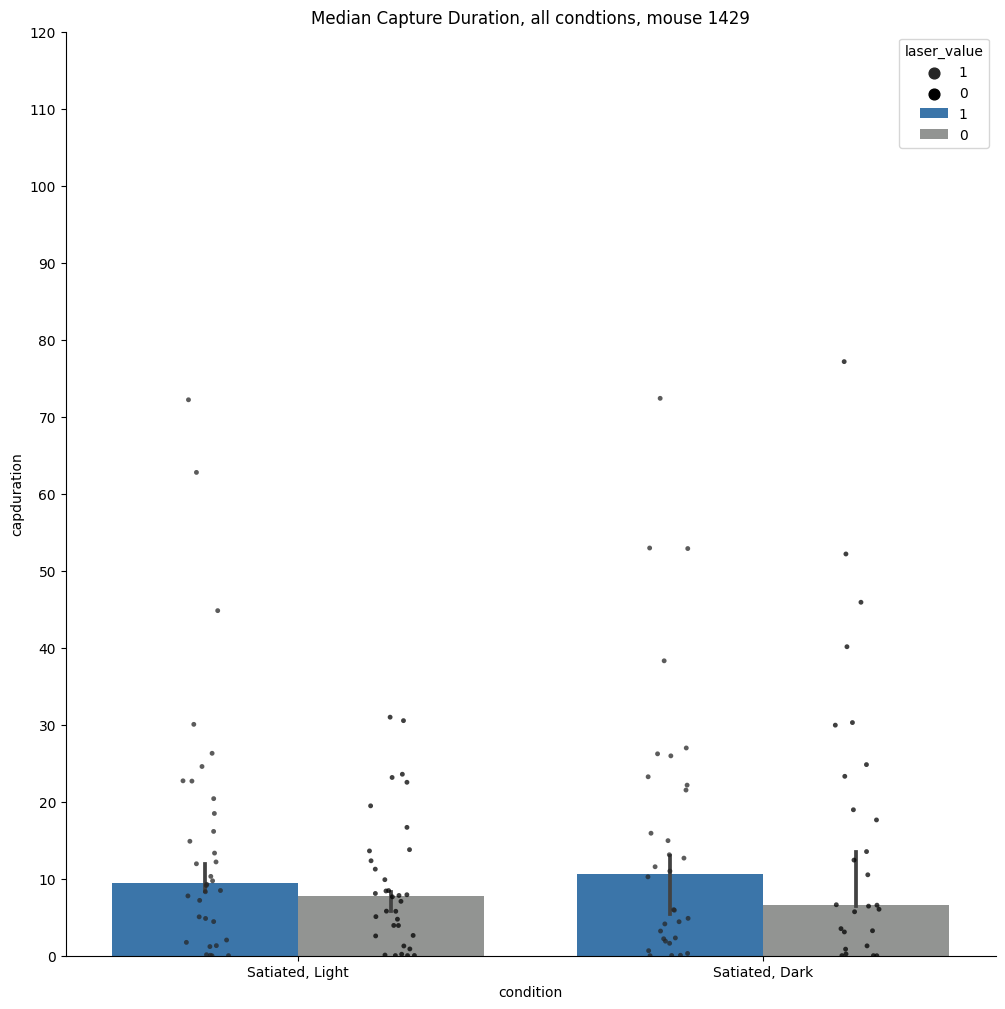

In [28]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1429, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order,estimator=np.median)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1429, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Median Capture Duration, all condtions, mouse 1429')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

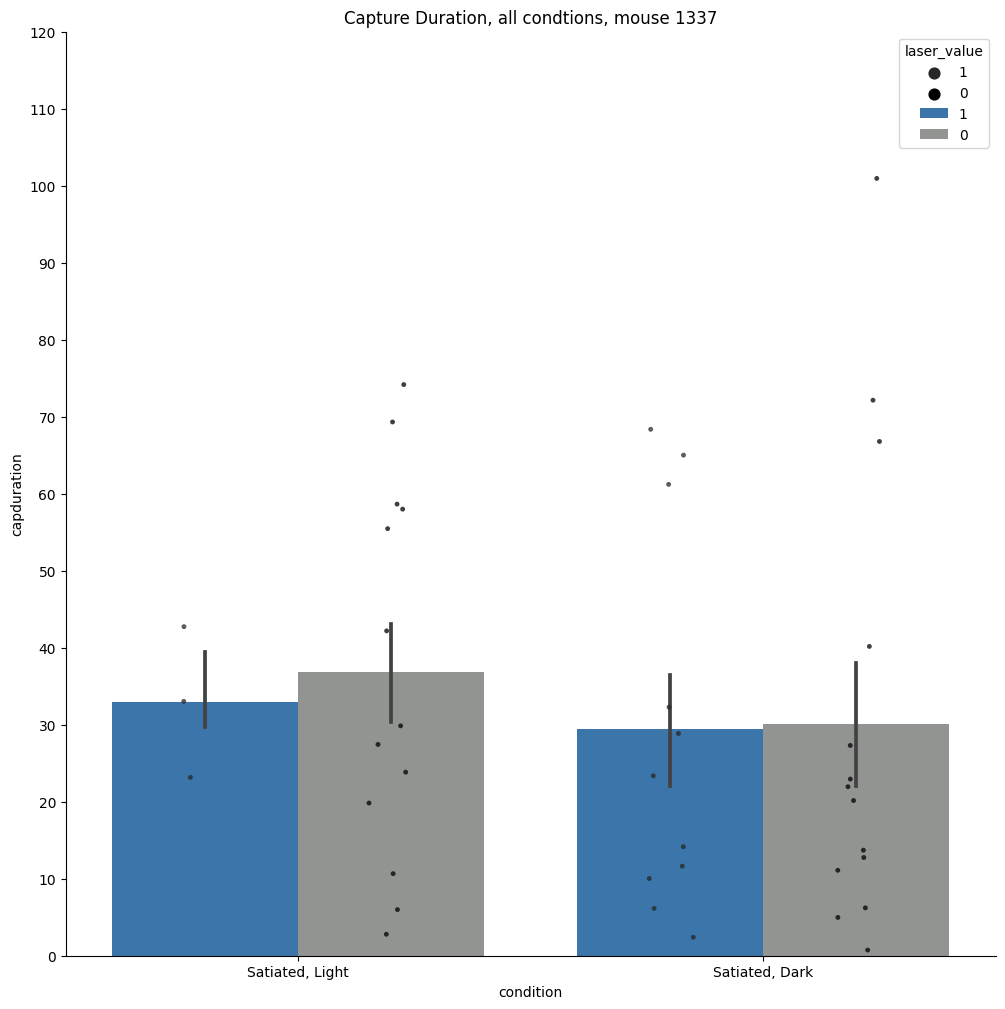

In [18]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1337, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1337, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, mouse 1337')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

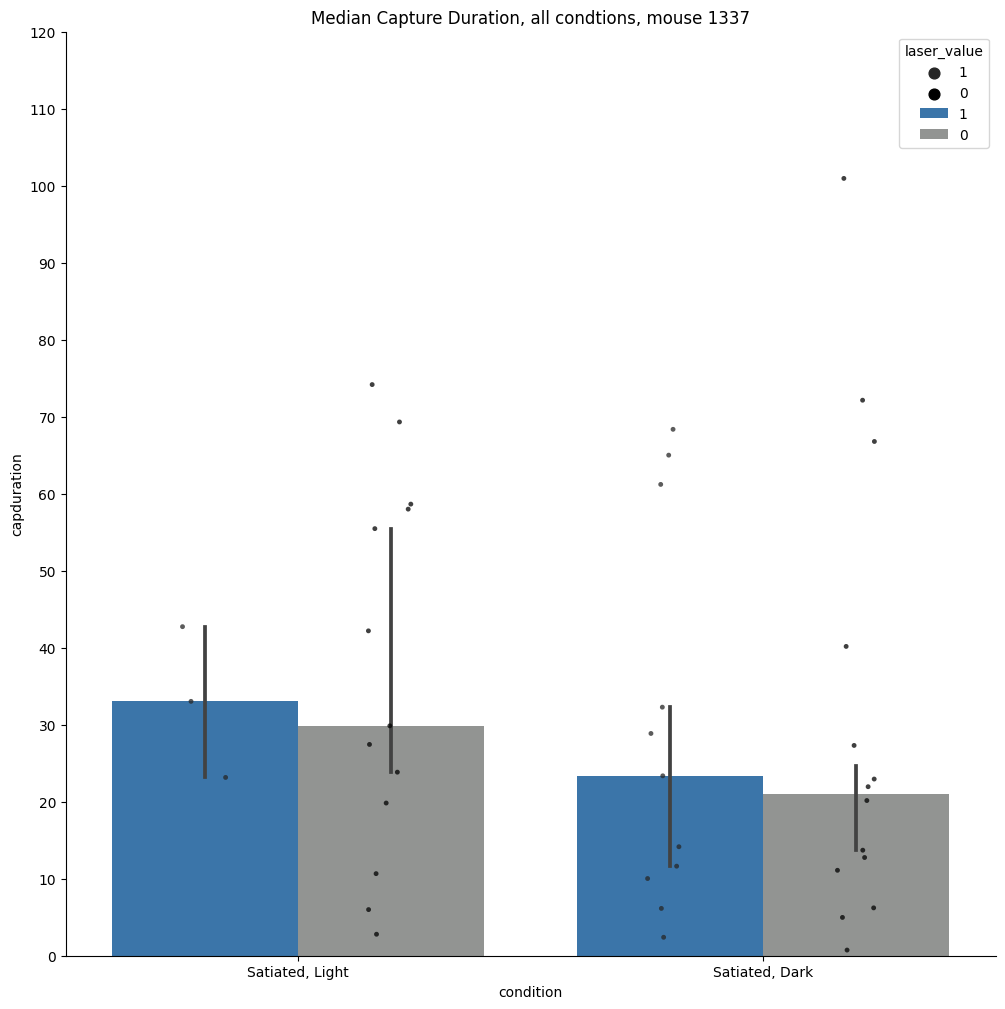

In [29]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df1337, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order,estimator=np.median)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df1337, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Median Capture Duration, all condtions, mouse 1337')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()